In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import os

In [2]:
for file in os.listdir("Prediction/Compare"):
    print(file)

GAT_10FoldCV_230421_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]96_[drugDim]96_[kFdim]64.npy
SAGE_10FoldCV_230420_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]1043_[drugDim]2166_[kFdim]64.npy
GIN_10FoldCV_230421_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]96_[drugDim]96_[kFdim]64.npy
SAGE_10FoldCV_230420_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]128_[drugDim]128_[kFdim]48.npy
attenGCN_10FoldCV_230421_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]96_[drugDim]96_[kFdim]64.npy
GCN_10FoldCV_230420_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]96_[drugDim]96_[kFdim]64.npy


In [9]:
score = np.load("Prediction/Compare/{}".format("SAGE_10FoldCV_230420_[lr]0.0001_[wd]0_[ep]250_[cvMthd]elem_[miRDim]128_[drugDim]128_[kFdim]48.npy")).reshape(-1)
score.shape

(2259138,)

In [5]:
label = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/m-d.csv",delimiter=',',header=None).values.reshape(-1)
label.shape

(2259138,)

0.844775573249539


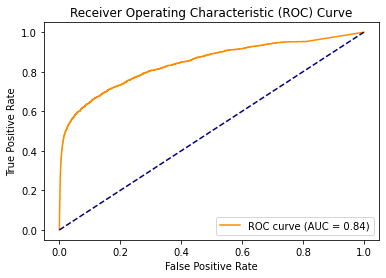

In [10]:
fpr, tpr, _ = mt.roc_curve(label, score)

# 计算 AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
# 绘制 ROC 曲线
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

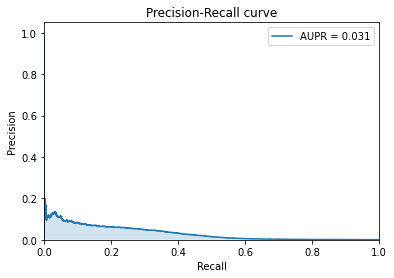

In [11]:
precision, recall, thresholds = mt.precision_recall_curve(label, score)
aupr = auc(recall, precision)
plt.plot(recall, precision, label='AUPR = %.3f' % aupr)
plt.fill_between(recall, precision, alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='upper right')
plt.show()

In [1]:
import torch as t

In [2]:
tens = t.load("/mnt/yzy/NIMCGCN/NIMCcode/dataset.pt")
tens.keys()

dict_keys(['md_p', 'md_true', 'fold_index', 'dd', 'mm'])

In [3]:
tens['md_p']

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [4]:
x , y = t.where(tens['md_p'] != 0)
one_index = t.stack((x,y),dim=0)
print(one_index.shape)

torch.Size([2, 1430])


In [5]:
x , y = t.where(tens['md_p'] == 0)
zero_index = t.stack((x,y),dim=0)
print(zero_index.shape)

torch.Size([2, 2257708])


In [6]:
print(tens['md_p'][one_index[0],one_index[1]])
print(tens['md_p'][zero_index[0],zero_index[1]])

tensor([1., 1., 1.,  ..., 1., 1., 1.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [7]:
tens['fold_one_index'] = tens['fold_index']
del tens['fold_index']

In [8]:
print(type(tens['fold_one_index']))

<class 'numpy.ndarray'>


In [9]:
print(tens['fold_one_index'].shape)
tens['fold_one_index'] = t.tensor(tens['fold_one_index'])
tens['fold_one_index']

(10, 143, 2)


tensor([[[ 771, 1019],
         [ 292, 1395],
         [ 757,  294],
         ...,
         [ 322, 1265],
         [  36, 1454],
         [ 333,  294]],

        [[ 858,  294],
         [ 312, 1285],
         [ 200,  686],
         ...,
         [ 324,  294],
         [ 298, 1094],
         [ 502, 1395]],

        [[ 353, 1453],
         [  18, 1094],
         [ 719, 1015],
         ...,
         [ 838,  674],
         [ 574, 1285],
         [ 195, 1019]],

        ...,

        [[ 866, 1094],
         [ 330, 1454],
         [ 209, 1094],
         ...,
         [ 183, 1019],
         [ 267,  262],
         [ 906,  864]],

        [[ 431,  294],
         [ 287, 1395],
         [ 906,  294],
         ...,
         [ 223,  294],
         [ 176,  674],
         [   9,  378]],

        [[1022, 1149],
         [ 861,  674],
         [ 587, 1141],
         ...,
         [  14, 1453],
         [ 366,  262],
         [ 345, 1285]]])

In [34]:
tens['fold_one_index'] = tens['fold_one_index'].transpose(1,2)

In [35]:
tens['fold_one_index'].shape

torch.Size([10, 2, 143])

In [12]:
print(type(tens['fold_one_index']))

<class 'torch.Tensor'>


In [13]:
shuffled_indices = t.randperm(zero_index.shape[1])
shuffled_zero_index = zero_index[:, shuffled_indices]
shuffled_zero_index.shape

torch.Size([2, 2257708])

In [14]:
shuffled_zero_index = t.cat((shuffled_zero_index,shuffled_zero_index[:,-2:]),dim=1)
shuffled_zero_index.shape

torch.Size([2, 2257710])

In [15]:
fold_zero_index = t.split(shuffled_zero_index, int(shuffled_zero_index.shape[1]/10), dim=1)
print(len(fold_zero_index))
print(fold_zero_index[0].shape)
print(type(fold_zero_index))
# fold_zero_index = t.tensor(fold_zero_index)
fold_zero_index

10
torch.Size([2, 225771])
<class 'tuple'>


(tensor([[ 452,  999,  423,  ...,  269,  793,  668],
         [ 282, 1579,  531,  ..., 1450,  685, 1311]]),
 tensor([[ 744,  800,   43,  ...,  921,  982,  521],
         [ 966,  514,  254,  ..., 1750,   66,  554]]),
 tensor([[ 959,  553,  895,  ...,  107,  896,   57],
         [1101, 1680, 1792,  ..., 2131, 2145,  311]]),
 tensor([[ 512,  762,  803,  ...,  634,  592,  352],
         [ 220, 2062,  523,  ..., 1423,  960,  278]]),
 tensor([[ 278,  346,  914,  ...,  477,  565,  352],
         [ 733,  456, 1183,  ..., 1622, 1775, 1612]]),
 tensor([[ 473,  581,  363,  ...,  582,  490,  354],
         [ 345,   25,  990,  ...,    4, 2073, 2041]]),
 tensor([[ 270,  408,   11,  ...,  590,  665,  632],
         [ 144,  432,  910,  ..., 1951, 1661, 2073]]),
 tensor([[ 145,  515,  819,  ...,  738,   30,  423],
         [1118, 1672, 1322,  ..., 1807, 2086, 1439]]),
 tensor([[  87,  500,   18,  ...,  436,  879, 1039],
         [ 762,  773, 1079,  ...,  865, 1817,  523]]),
 tensor([[ 453,  594,  307, 

In [22]:
t.empty((10,2,225771)).shape

torch.Size([10, 2, 225771])

In [24]:
new_fold_zero_index = t.empty((10,2,225771))
new_fold_zero_index.shape

torch.Size([10, 2, 225771])

In [26]:
for i in range(10):
    new_fold_zero_index[i,:,:] = fold_zero_index[i]

In [31]:
print(new_fold_zero_index.shape)
fold_zero_index = new_fold_zero_index
fold_zero_index

torch.Size([10, 2, 225771])


tensor([[[ 452.,  999.,  423.,  ...,  269.,  793.,  668.],
         [ 282., 1579.,  531.,  ..., 1450.,  685., 1311.]],

        [[ 744.,  800.,   43.,  ...,  921.,  982.,  521.],
         [ 966.,  514.,  254.,  ..., 1750.,   66.,  554.]],

        [[ 959.,  553.,  895.,  ...,  107.,  896.,   57.],
         [1101., 1680., 1792.,  ..., 2131., 2145.,  311.]],

        ...,

        [[ 145.,  515.,  819.,  ...,  738.,   30.,  423.],
         [1118., 1672., 1322.,  ..., 1807., 2086., 1439.]],

        [[  87.,  500.,   18.,  ...,  436.,  879., 1039.],
         [ 762.,  773., 1079.,  ...,  865., 1817.,  523.]],

        [[ 453.,  594.,  307.,  ...,  893.,  365.,  893.],
         [1966.,  192.,  880.,  ..., 2122., 1596., 2122.]]])

In [42]:
dataset = {
    'md_p':tens['md_p'],
    'md_true':tens['md_true'],
    'mm':tens['mm'],
    'dd':tens['dd'],
    'fold_one_index':tens['fold_one_index'],
    'fold_zero_index':fold_zero_index
}

In [44]:
print(dataset.keys())
print(dataset['md_p'].shape)
print(dataset['md_true'].shape)
print(dataset['mm']['data'].shape)
print(dataset['mm']['edge_index'].shape)
print(dataset['dd']['data'].shape)
print(dataset['dd']['edge_index'].shape)
print(dataset['fold_one_index'].shape)
print(dataset['fold_zero_index'].shape)
print(1043*1043,2166*2166)

dict_keys(['md_p', 'md_true', 'mm', 'dd', 'fold_one_index', 'fold_zero_index'])
torch.Size([1043, 2166])
torch.Size([1043, 2166])
torch.Size([1043, 1043])
torch.Size([2, 948255])
torch.Size([2166, 2166])
torch.Size([2, 4670244])
torch.Size([10, 2, 143])
torch.Size([10, 2, 225771])
1087849 4691556


In [45]:
t.save(dataset,"/mnt/yzy/NIMCGCN/new_dataset.pt")